# INTRODUCTION

The aim of this assignment is to implement a simple linear regression (using gradient descent) model on a dataset

> Two columns are extracted from the bank client data namely:
1. age (numeric) - X
1. balance: client's total balance? (numeric) - Y (Target)

The linear regression model should be able to predict the client's balance based on their age

# IMPORTING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
len(bank)

45211

In [4]:
# the bank dataset consists of over 45000 rows so lets focus on random 100 customers
bank = bank.iloc[3100:3200, :]

In [5]:
# Check/Remove null values
bank.isnull().values.any()

False

# Exploring the data & implementing the Linear Regression model with the data as is

In [6]:
# Predict Balance based on Age
X = bank['age'] # Feature
Y = bank['balance'] # Target

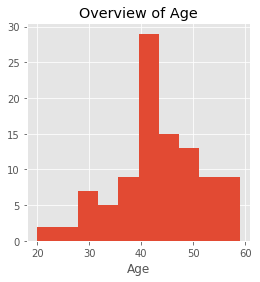

In [7]:
plt.figure(figsize = (4,4))
plt.hist(X)
plt.xlabel('Age')
plt.title("Overview of Age")
plt.show()

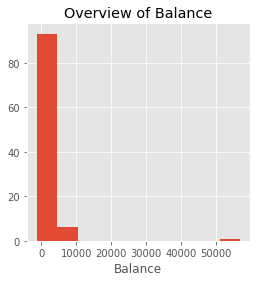

In [8]:
plt.figure(figsize = (4,4))
plt.hist(Y)
plt.xlabel('Balance')
plt.title("Overview of Balance")
plt.show()

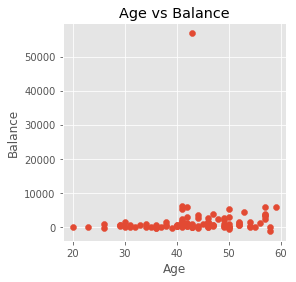

In [9]:
plt.figure(figsize = (4,4))
plt.scatter(X,Y)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Age vs Balance")
plt.show()

In [10]:
# removing the outlier
bank = bank[bank['balance'] != bank['balance'].max()]

In [11]:
X = bank['age'] # Feature
Y = bank['balance'] # Target

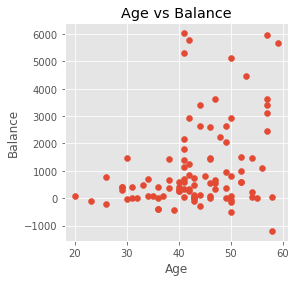

In [12]:
plt.figure(figsize = (4,4))
plt.scatter(X,Y)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Age vs Balance")
plt.show()

# Building the model

In [13]:
m = 0 # gradient
c = 0 # Intercept

alpha = 0.005  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Partial derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Partial derivative wrt c
    m = m - alpha * D_m  # Update m
    c = c - alpha * D_c  # Update c
    
    print("Iteration: {}".format(i+1), "\nGradient: {}".format(m), "\nIntercept: {}".format(c), "\n")
    
print("\nProcess Complete... after {} epochs".format(epochs))    
print("Gradient(m): {}".format(m), "Intercept(c): {}".format(c))

Iteration: 1 
Gradient: 521.789898989899 
Intercept: 11.029797979797982 

Iteration: 2 
Gradient: -9134.364625905524 
Intercept: -204.2123642995613 

Iteration: 3 
Gradient: 169565.6002481972 
Intercept: 3768.006891642485 

Iteration: 4 
Gradient: -3137509.779618302 
Intercept: -69754.19799192189 

Iteration: 5 
Gradient: 58064228.211913906 
Intercept: 1290858.8651336674 

Iteration: 6 
Gradient: -1074553655.267811 
Intercept: -23889069.325772442 

Iteration: 7 
Gradient: 19886015641.805317 
Intercept: 442098290.4532609 

Iteration: 8 
Gradient: -368016622715.0586 
Intercept: -8181604814.652449 

Iteration: 9 
Gradient: 6810626987185.738 
Intercept: 151411254483.9497 

Iteration: 10 
Gradient: -126039524010132.92 
Intercept: -2802062494616.931 

Iteration: 11 
Gradient: 2332525572558898.0 
Intercept: 51855816466449.39 

Iteration: 12 
Gradient: -4.316642409886063e+16 
Intercept: -959659431784086.4 

Iteration: 13 
Gradient: 7.988509071043288e+17 
Intercept: 1.7759747850231842e+16 

Ite

# Making predictions

+ Using the m & c generated after training the model and hopefully reaching global/local minima

In [14]:
Y_pred = m*X + c

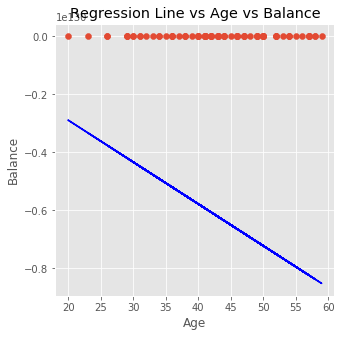

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y) 
plt.plot(X, Y_pred, color='blue') # regression line
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Regression Line vs Age vs Balance")
plt.show()

+ As seen above the model performs poorly and fails to produce a line of best fit due to each column not being represented on the same scale

+ Lets see how the model performs after each column is standardized.

> Making use of a Standardardazion / Normalising technique to normalise columns with high variance: scaling between 0 and 1

# Performing Feature Standardization before implementing the model

In [16]:
# for every value within the column value v: apply the formula
# taking the minimum and maximum value within the balance column and using the standardized formula

new_X = (X - X.min()) / (X.max() - X.min())
new_Y = (Y - Y.min()) / (Y.max() - Y.min())

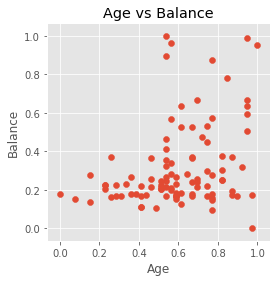

In [17]:
plt.figure(figsize = (4,4))
plt.scatter(new_X,new_Y)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Age vs Balance")
plt.show()

# Fitting the model on the Standardized variables
+ alpha = 0.0001 & iterations = 100

In [18]:
new_m = 0 # gradient
new_c = 0 # Intercept

new_alpha = 0.0001  # The learning Rate
new_epochs = 100  # The number of iterations to perform gradient descent

new_n = float(len(new_X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(new_epochs): 
    new_Y_pred = new_m*new_X + new_c  # The current predicted value of Y
    new_D_m = (-2/new_n) * sum(new_X * (new_Y - new_Y_pred))  # Partial derivative wrt m
    new_D_c = (-2/new_n) * sum(new_Y - new_Y_pred)  # Partial derivative wrt c
    new_m = new_m - new_alpha * new_D_m  # Update m
    new_c = new_c - new_alpha * new_D_c  # Update c
    
    print("Iteration: {}".format(i+1), "\nGradient: {}".format(new_m), "\nIntercept: {}".format(new_c), "\n")
    
print("\nProcess Complete... after {} epochs".format(new_epochs))    
print("Gradient(m): {}".format(new_m), "Intercept(c): {}".format(new_c))

Iteration: 1 
Gradient: 4.119467050954942e-05 
Intercept: 6.363957918283176e-05 

Iteration: 2 
Gradient: 8.237838637196234e-05 
Intercept: 0.00012726149903912782 

Iteration: 3 
Gradient: 0.0001235511505884527 
Intercept: 0.00019086576441213336 

Iteration: 4 
Gradient: 0.00016471296615941153 
Intercept: 0.0002544523801437657 

Iteration: 5 
Gradient: 0.0002058638360844073 
Intercept: 0.0003180213510746146 

Iteration: 6 
Gradient: 0.0002470037633621861 
Intercept: 0.00038157268204394264 

Iteration: 7 
Gradient: 0.0002881327509906718 
Intercept: 0.0004451063778896855 

Iteration: 8 
Gradient: 0.0003292508019669663 
Intercept: 0.0005086224434484525 

Iteration: 9 
Gradient: 0.0003703579192873498 
Intercept: 0.0005721208835555267 

Iteration: 10 
Gradient: 0.0004114541059472809 
Intercept: 0.0006356017030448656 

Iteration: 11 
Gradient: 0.0004525393649413971 
Intercept: 0.000699064906749101 

Iteration: 12 
Gradient: 0.0004936136992635148 
Intercept: 0.0007625104994995404 

Iteration:

In [19]:
new_Y_pred = new_m*new_X + new_c

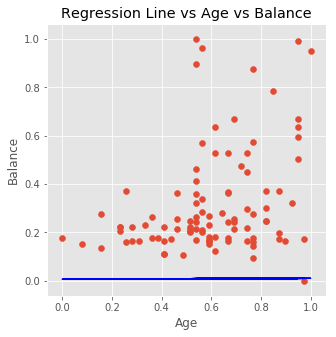

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(new_X, new_Y) 
plt.plot(new_X, new_Y_pred, color='blue') # regression line
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Regression Line vs Age vs Balance")
plt.show()

> As expected the linear regression model is able to initialize once the data has been standardized. The unstandardized data model was unable to initialize due to the data not being on the same scale, which resulted in almost random gradient values as it attempted to find the global/local minima.

> After the standardidation, the line of best fit was formed but due to the low amount of iterations was unable to converge

> A learning rate of 0.0001 was used, with 100 iterations.

# Using a higher learning rate with a higher iteration
+ alpha = 0.005 & epochs = 1000

In [21]:
new_m = 0 # gradient
new_c = 0 # Intercept

new_alpha = 0.005  # The learning Rate
new_epochs = 1000  # The number of iterations to perform gradient descent

new_n = float(len(new_X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(new_epochs): 
    new_Y_pred = new_m*new_X + new_c  # The current predicted value of Y
    new_D_m = (-2/new_n) * sum(new_X * (new_Y - new_Y_pred))  # Partial derivative wrt m
    new_D_c = (-2/new_n) * sum(new_Y - new_Y_pred)  # Partial derivative wrt c
    new_m = new_m - new_alpha * new_D_m  # Update m
    new_c = new_c - new_alpha * new_D_c  # Update c
    
    ### commented out on purpose
    #print("Iteration: {}".format(i+ 1), "\nGradient: {}".format(new_m), 
    #"\nIntercept: {}".format(new_c), "\n")
    
print("\nProcess Complete... after {} epochs".format(new_epochs))    
print("Gradient(m): {}".format(new_m), "Intercept(c): {}".format(new_c))


Process Complete... after 1000 epochs
Gradient(m): 0.19951142488472115 Intercept(c): 0.20158307777849563


In [22]:
new_Y_pred = new_m*new_X + new_c

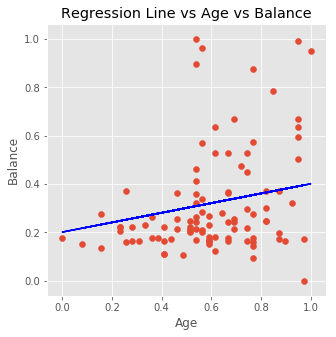

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(new_X, new_Y) 
plt.plot(new_X, new_Y_pred, color='blue') # regression line
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title("Regression Line vs Age vs Balance")
plt.show()

# Using a lower learning rate with a higher iteration
+ alpha = 0.001 & epochs = 2000

In [24]:
new_m = 0 # gradient
new_c = 0 # Intercept

m_list = []
c_list = [] 

new_alpha = 0.001  # The learning Rate
new_epochs = 2000  # The number of iterations to perform gradient descent

new_n = float(len(new_X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(new_epochs): 
    # append current m and c into a list
    m_list.append(new_m)
    c_list.append(new_c)
    
    new_Y_pred = new_m*new_X + new_c  # The current predicted value of Y
    new_D_m = (-2/new_n) * sum(new_X * (new_Y - new_Y_pred))  # Partial derivative wrt m
    new_D_c = (-2/new_n) * sum(new_Y - new_Y_pred)  # Partial derivative wrt c
    new_m = new_m - new_alpha * new_D_m  # Update m
    new_c = new_c - new_alpha * new_D_c  # Update c
    
    ### Commented out to reduce number of pages
    #print("Iteration: {}".format(i+ 1), "\nGradient: {}".format(new_m), 
          #"\nIntercept: {}".format(new_c), "\n")
    
print("\nProcess Complete... after {} epochs".format(new_epochs))    
print("Gradient(m): {}".format(new_m), "Intercept(c): {}".format(new_c))


Process Complete... after 2000 epochs
Gradient(m): 0.16878962845968176 Intercept(c): 0.21927932474659825


In [25]:
new_Y_pred = new_m*new_X + new_c

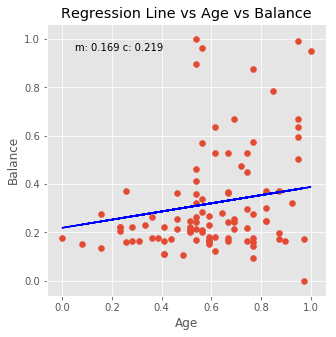

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(new_X, new_Y) 
plt.plot(new_X, new_Y_pred, color='blue') # regression line
plt.xlabel('Age')
plt.ylabel('Balance')
plt.text(0.1,0.9,"m: {} c: {}".format(round(new_m, 3), round(new_c, 3)),transform=plt.gca().transAxes)
plt.title("Regression Line vs Age vs Balance")
plt.show()

# The algorithm in action as it finds the line of best fit

In [27]:
y_pred_list = [] # list to store predictions

# Store every prediction for each cobination of m and c
for i in range(len(m_list)):
    pred = m_list[i]*new_X + c_list[i]
    y_pred_list.append(pred)

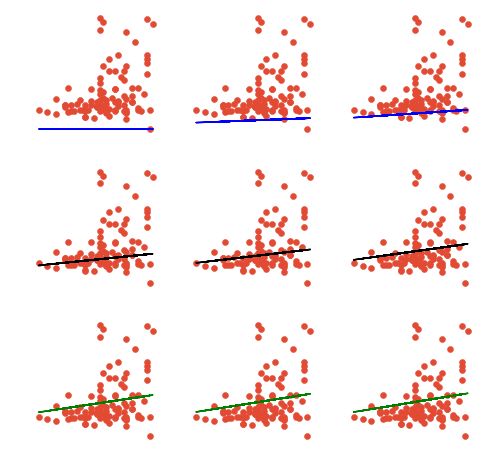

In [28]:
fig, ax = plt.subplots(3, 3, figsize =(8,8)) # 5 rows, 5 columns

ax[0, 0].scatter(new_X,new_Y) #row=0, col=0
ax[0, 0].plot(new_X, y_pred_list[0], 'b')
ax[0, 1].scatter(new_X,new_Y)
ax[0, 1].plot(new_X, y_pred_list[112], 'b')
ax[0, 2].scatter(new_X,new_Y)
ax[0, 2].plot(new_X, y_pred_list[224], 'b')
ax[1, 0].scatter(new_X,new_Y) #row=1, col=0
ax[1, 0].plot(new_X, y_pred_list[420], 'k')
ax[1, 1].scatter(new_X,new_Y)
ax[1, 1].plot(new_X, y_pred_list[560], 'k')
ax[1, 2].scatter(new_X,new_Y) 
ax[1, 2].plot(new_X, y_pred_list[888], 'k')
ax[2, 0].scatter(new_X,new_Y) #row=2, col=0
ax[2, 0].plot(new_X, y_pred_list[1200], 'g')
ax[2, 1].scatter(new_X,new_Y)
ax[2, 1].plot(new_X, y_pred_list[1600], 'g')
ax[2, 2].scatter(new_X,new_Y)
ax[2, 2].plot(new_X, y_pred_list[1999], 'g')
[axi.set_axis_off() for axi in ax.ravel()]
plt.show()

# New Prediction

In [29]:
value = int(input("Enter Age: "))
# Standardize value first
my_x = (value - new_X.min()) / (new_X.max() - new_X.min())


my_pred = new_m*my_x + new_c
# value had been standardized so to get original value
pred_balance = my_pred * 100
print("Predicted Balance: {}".format(pred_balance))

Enter Age: 60
Predicted Balance: 1034.6657032327503


***